In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/nooshy/Downloads/Sleep_health_and_lifestyle_dataset.csv")
df = df.set_index('Person ID')

print(df[:10])

          Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                                       
1           Male   27     Software Engineer             6.1                 6   
2           Male   28                Doctor             6.2                 6   
3           Male   28                Doctor             6.2                 6   
4           Male   28  Sales Representative             5.9                 4   
5           Male   28  Sales Representative             5.9                 4   
6           Male   28     Software Engineer             5.9                 4   
7           Male   29               Teacher             6.3                 6   
8           Male   29                Doctor             7.8                 7   
9           Male   29                Doctor             7.8                 7   
10          Male   29                Doctor             7.8                 7   

           Physical Activit

In [10]:
#create a new dataframe that is a subset of original dataframe; only with necessary cols

sleep_df = pd.DataFrame(df, columns = ['Sleep Duration', 'Quality of Sleep', 'Stress Level'])

sleep_df[:10]

,Sleep Duration,Quality of Sleep,Stress Level
Person ID,,,
1,6.1,6,6
2,6.2,6,8
3,6.2,6,8
4,5.9,4,8
5,5.9,4,8
6,5.9,4,8
7,6.3,6,7
8,7.8,7,6
9,7.8,7,6


In [11]:
#Cleaning:
#Remove whitespace
sleep_df.columns = sleep_df.columns.str.strip()

#Drop any nas
sleep_df = sleep_df.dropna(subset = ['Sleep Duration', 'Quality of Sleep', 'Stress Level'])

In [24]:
inertia_values = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sleep_df)
    inertia_values.append(kmeans.inertia_)

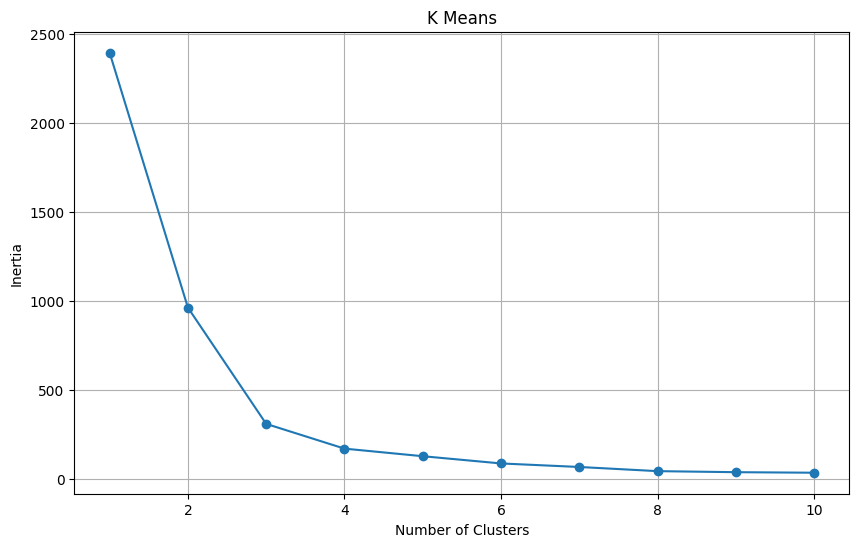

In [42]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), inertia_values, marker = 'o')
plt.title('K Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 4)
cluster_labels = kmeans.fit_predict(sleep_df)
sleep_df['cluster'] = cluster_labels
print(sleep_df[:20])

           Sleep Duration  Quality of Sleep  Stress Level  cluster
Person ID                                                         
1                     6.1                 6             6        1
2                     6.2                 6             8        1
3                     6.2                 6             8        1
4                     5.9                 4             8        1
5                     5.9                 4             8        1
6                     5.9                 4             8        1
7                     6.3                 6             7        1
8                     7.8                 7             6        3
9                     7.8                 7             6        3
10                    7.8                 7             6        3
11                    6.1                 6             8        1
12                    7.8                 7             6        3
13                    6.1                 6             8     

In [27]:
grouped = sleep_df.groupby('cluster')

print(grouped.get_group(0)[:5])
print(grouped.get_group(1)[:5])
print(grouped.get_group(2)[:5])
print(grouped.get_group(3)[:5])

           Sleep Duration  Quality of Sleep  Stress Level  cluster
Person ID                                                         
150                   8.0                 9             3        0
151                   8.0                 9             3        0
277                   8.1                 9             3        0
278                   8.1                 9             3        0
280                   8.3                 9             3        0
           Sleep Duration  Quality of Sleep  Stress Level  cluster
Person ID                                                         
1                     6.1                 6             6        1
2                     6.2                 6             8        1
3                     6.2                 6             8        1
4                     5.9                 4             8        1
5                     5.9                 4             8        1
           Sleep Duration  Quality of Sleep  Stress Level  clu

In [28]:
for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    person_samp = group.sample(n = 5).index
    for person in person_samp:
        print(f"ID: {person}\tSleep Duration: {df.loc[person, "Sleep Duration"]} \t Sleep Quality: {df.loc[person, "Quality of Sleep"]} \t Stress Level: {df.loc[person, "Stress Level"]} \t Occupation: {df.loc[person, "Occupation"]} ")


Cluster 0:
ID: 331	Sleep Duration: 8.5 	 Sleep Quality: 9 	 Stress Level: 3 	 Occupation: Engineer 
ID: 301	Sleep Duration: 8.5 	 Sleep Quality: 9 	 Stress Level: 3 	 Occupation: Engineer 
ID: 353	Sleep Duration: 8.0 	 Sleep Quality: 9 	 Stress Level: 3 	 Occupation: Nurse 
ID: 278	Sleep Duration: 8.1 	 Sleep Quality: 9 	 Stress Level: 3 	 Occupation: Doctor 
ID: 341	Sleep Duration: 8.1 	 Sleep Quality: 9 	 Stress Level: 4 	 Occupation: Nurse 

Cluster 1:
ID: 76	Sleep Duration: 6.0 	 Sleep Quality: 6 	 Stress Level: 8 	 Occupation: Doctor 
ID: 245	Sleep Duration: 6.3 	 Sleep Quality: 6 	 Stress Level: 7 	 Occupation: Salesperson 
ID: 80	Sleep Duration: 6.0 	 Sleep Quality: 6 	 Stress Level: 8 	 Occupation: Doctor 
ID: 222	Sleep Duration: 6.4 	 Sleep Quality: 6 	 Stress Level: 7 	 Occupation: Salesperson 
ID: 78	Sleep Duration: 6.0 	 Sleep Quality: 6 	 Stress Level: 8 	 Occupation: Doctor 

Cluster 2:
ID: 214	Sleep Duration: 7.8 	 Sleep Quality: 8 	 Stress Level: 5 	 Occupation: Engine

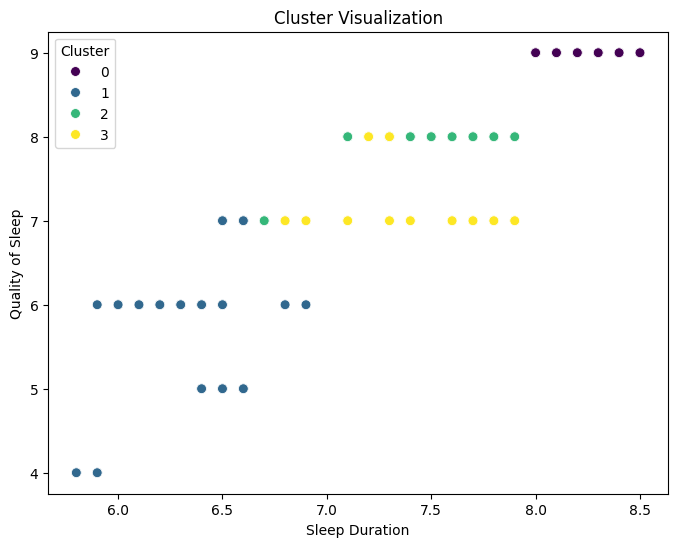

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Sleep Duration', 
    y='Quality of Sleep', 
    hue='cluster', 
    data=sleep_df, 
    palette='viridis', 
    s=50
)
plt.title('Cluster Visualization')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.legend(title='Cluster')
plt.show()